# ASSIGNMENT 5

### Data Analytics 2

1. Implement Logistic Regression using Python/R to perform classification on Social_Networks_Ads.csv dataset.
2. Compute confusion matrix to find TP,FP,TN,FN, Accuracy, Error Rate, Precision, Recall on the given dataset.

## > Importing Libraries and Loading Dataset

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## > Data Preprocessing

In [4]:
#checks total size(rows*columns)
df.size

2000

In [5]:
#checks dimensions of dataframe
df.shape

(400, 5)

In [6]:
#checks the columns present
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
#checks datatype of each column
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [8]:
#prints information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
#checks initial statistics
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## > Data Formatting

The first thing we need to do is split our data into an x-array (which contains the data that we will use to make predictions) and a y-array (which contains the data that we are trying to predict).

x: Similar to linear regression, the input array x is a two-dimensional array that contains the independent variables or features of the dataset. Each row in the array represents a single instance or data point, and each column represents a specific feature or attribute. The shape of x would be (n_samples, n_features), where n_samples is the number of data points, and n_features is the number of features.

y: The target array y is a one-dimensional array that contains the corresponding target or dependent variable values for each instance in the dataset. In logistic regression, the target array y represents the binary categorical variable, indicating the class membership or the probability of an instance belonging to a particular class. The shape of y would be (n_samples,), matching the number of data points.

In [10]:
#Extracting Independent Variables
x = df.iloc[:,[2,3]].values

In [11]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [87]:
#Extracting Dependent Variables
y = df.iloc[:,4].values

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

## > Splitting the dataset into 75% training & 25% testing

In machine learning, the dataset is typically divided into two subsets: the training set and the test set. These subsets are commonly denoted as x_train and x_test, respectively.

x_train: This is the subset of the dataset that is used for training the machine learning model. It contains the input features (independent variables) that are used to learn the underlying patterns and relationships in the data.

x_test: This is the subset of the dataset that is used for evaluating the trained model's performance. It also contains the input features, but these data points are not used during the training phase. Instead, they are used to assess how well the model can generalize to unseen data.
When training a model, the ultimate goal is to make predictions on new, unseen data points. To evaluate the model's performance, we need to compare its predictions to the true values of the target variable for the test set. Therefore, we also have a corresponding set of target variable values, typically denoted as y_test.

In summary, x_train and x_test represent the input features used for training and evaluating the model, respectively. y_test is the corresponding set of true target variable values for the test set, and y_pred is the predicted target variable values generated by the trained model when applied to the test set.

In [15]:
#Split the data set into training data and test data
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,test_size=0.25,random_state=0)

In [17]:
x_train

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],
       [    26,  15000],
       [    60, 102000],
       [    38, 112000],
       [    40, 107000],
       [    42,  53000],
       [    35,  59000],
       [    48,  41000],
       [    48, 134000],
       [    38, 113000],
       [    29, 148000],
       [    26,  15000],
       [    60,  42000],
       [    24,  19000],
       [    42, 149000],
       [    46,  96000],
       [    28,  59000],
       [    39,  96000],
       [    28,  89000],
       [    41,  72000],
       [    45,  26000],


In [18]:
x_train.shape

(300, 2)

In [19]:
x_test

array([[    30,  87000],
       [    38,  50000],
       [    35,  75000],
       [    30,  79000],
       [    35,  50000],
       [    27,  20000],
       [    31,  15000],
       [    36, 144000],
       [    18,  68000],
       [    47,  43000],
       [    30,  49000],
       [    28,  55000],
       [    37,  55000],
       [    39,  77000],
       [    20,  86000],
       [    32, 117000],
       [    37,  77000],
       [    19,  85000],
       [    55, 130000],
       [    35,  22000],
       [    35,  47000],
       [    47, 144000],
       [    41,  51000],
       [    47, 105000],
       [    23,  28000],
       [    49, 141000],
       [    28,  87000],
       [    29,  80000],
       [    37,  62000],
       [    32,  86000],
       [    21,  88000],
       [    37,  79000],
       [    57,  60000],
       [    37,  53000],
       [    24,  58000],
       [    18,  52000],
       [    22,  81000],
       [    34,  43000],
       [    31,  34000],
       [    49,  36000],


In [20]:
x_test.shape

(100, 2)

In [21]:
y_train

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], d

In [22]:
y_train.shape

(300,)

In [23]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [24]:
y_test.shape

(100,)

## > Data Standardization

In logistic regression, we will do feature scaling because we want accurate result of predictions.

The purpose of standardization is to ensure that the features have similar scales and distributions, which can be beneficial for certain machine learning algorithms, particularly those that rely on distance calculations or gradient descent optimization. By transforming the features, you can make them have zero mean and unit variance, which can help in improving the model's performance and convergence.

However, the target variable, usually denoted as y, does not need to be transformed because it represents the variable we are trying to predict. The model's goal is to make accurate predictions for the target variable based on the provided features. Transforming the target variable wouldn't make sense as it would change the actual values you are trying to predict.

So, during the train-test split, you apply the transformation only to the features (x_train and x_test) to ensure that they have similar scales and distributions. The target variable (y_train and y_test) remains untouched as it is used for evaluating the model's performance and making predictions.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc_x = StandardScaler()

In [27]:
x_train = sc_x.fit_transform(x_train)

In [28]:
x_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [29]:
x_test = sc_x.fit_transform(x_test)

In [30]:
x_test

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566],
       [-0.81070599, -1.53554892],
       [-0.45975102, -1.68843113],
       [-0.0210573 ,  2.25592989],
       [-1.60035469, -0.0678797 ],
       [ 0.94406888, -0.83229075],
       [-0.54748976, -0.6488321 ],
       [-0.72296725, -0.46537345],
       [ 0.06668145, -0.46537345],
       [ 0.24215893,  0.20730828],
       [-1.4248772 ,  0.48249625],
       [-0.37201227,  1.43036596],
       [ 0.06668145,  0.20730828],
       [-1.51261594,  0.45191981],
       [ 1.64597884,  1.8278597 ],
       [-0.10879604, -1.47439603],
       [-0.10879604, -0.70998498],
       [ 0.94406888,  2.25592989],
       [ 0.41763642, -0.58767922],
       [ 0.94406888,  1.06344865],
       [-1.16166097, -1.29093738],
       [ 1.11954637,  2.16420057],
       [-0.72296725,  0.5130727 ],
       [-0.63522851,  0.2990376 ],
       [ 0.06668145,

## > Initializing Logistic Regression Model and Training the Model

Logistic regression is a popular algorithm used for binary classification tasks, where the goal is to predict the probability of an instance belonging to a particular class.

In [32]:
from sklearn.linear_model import LogisticRegression

In [35]:
#Create the model
classifier = LogisticRegression(random_state=0)

In [36]:
classifier

LogisticRegression(random_state=0)

In [37]:
#Train the model
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

## Predicting the test set results and calculating the accuracy

Once the model is trained using x_train and the corresponding target variable values y_train, we can use the trained model to make predictions on new, unseen data. To do so, we feed the test set (x_test) into the trained model, which generates predicted values for the target variable, denoted as y_pred. By comparing y_pred with the actual values of y_test, we can evaluate the model's performance and assess how well it generalizes to unseen data.

In [38]:
y_pred = classifier.predict(x_test)

In [39]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

 y_test( the actual values) and y_pred (the targeted value return by the classifier).

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
acc = accuracy_score(y_test,y_pred)

In [45]:
acc

0.87

In [85]:
#Calculate performance metrics

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.83      0.75      0.79        32

    accuracy                           0.87       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100



## > Confusion Matrix

Confusion matrix is a summary of prediction results on a classification problem.

A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data.

The matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model on the test data.

For binary classification, the matrix will be of a 2X2 table, For multi-class classification, the matrix shape will be equal to the number of classes i.e for n classes it will be nXn. 

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cm = confusion_matrix(y_test,y_pred)

In [42]:
cm

array([[63,  5],
       [ 8, 24]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

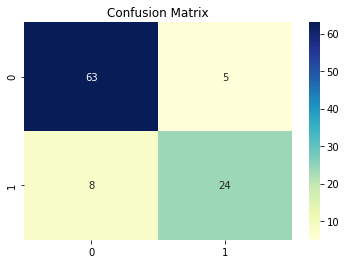

In [118]:
sns.heatmap(cm,annot=True,cmap='YlGnBu').set_title("Confusion Matrix")

A binary classifier predicts all data instances of a test dataset as either positive or negative. This classification (or prediction) produces four outcomes – true positive, true negative, false positive and false negative.

True positive (TP): correct positive prediction

False positive (FP): incorrect positive prediction

True negative (TN): correct negative prediction

False negative (FN): incorrect negative prediction


## > True Positive : actually true predicted true

In [46]:
tp = cm[0,[0]]

In [47]:
tp

array([63], dtype=int64)

In [48]:
print("TRUE POSITIVE : ",tp)

TRUE POSITIVE :  [63]


## > False Positive : actually false predicted true [Type-1 Error]

In [50]:
fp = cm[0,[1]]

In [51]:
fp

array([5], dtype=int64)

In [52]:
print("FALSE POSITIVE : ",fp)

FALSE POSITIVE :  [5]


## > False Negative : actually true predicted false [Type-2 Error]

In [53]:
fn = cm[1,[0]]

In [54]:
fn

array([8], dtype=int64)

In [55]:
print("FALSE NEGATIVE : ",fn)

FALSE NEGATIVE :  [8]


## > True Negative : actually false predicted false

In [56]:
tn = cm[1,[1]]

In [57]:
tn

array([24], dtype=int64)

In [58]:
print("TRUE NEGATIVE : ",tn)

FALSE NEGATIVE :  [24]


## > Accuracy using Confusion Matrix

Accuracy (ACC) is calculated as the number of all correct predictions divided by the total number of the dataset. 

The best accuracy is 1.0, whereas the worst is 0.0. 

It can also be calculated by 1 – ERR.

In [65]:
accuracy = (tp+tn)/(tp+fp+tn+fn)

In [66]:
accuracy

array([0.87])

In [67]:
print("ACCURACY :",accuracy*100)

ACCURACY : [87.]


## > Error Rate

Error rate is calculated as the number of all incorrect predictions divided by the total number of the dataset. 

The best error rate is 0.0, whereas the worst is 1.0.

In [71]:
error_rate = (fp+fn)/(tp+fp+tn+fn)

In [72]:
error_rate

array([0.13])

In [73]:
print("ERROR RATE :",error_rate*100)

ERROR RATE : [13.]


## > Precision

Precision is calculated as the number of correct positive predictions divided by the total number of positive predictions.

It is also called positive predictive value (PPV). 

The best precision is 1.0, whereas the worst is 0.0.

In [74]:
precision = (tp)/(tp+fp)

In [75]:
precision

array([0.92647059])

In [76]:
print("PRECISION :",precision*100)

PRECISION : [92.64705882]


## > Recall

Recall indicates the proportion of correctly identified positive instances out of all the actual positive instances.

It is also called Sensitivity (SN) or true positive rate (TPR). 

The best sensitivity is 1.0, whereas the worst is 0.0.

In [77]:
recall = (tp)/(tp+fn)

In [78]:
recall

array([0.88732394])

In [79]:
print("RECALL :",recall*100)

RECALL : [88.73239437]


## > Specify

Specificity is calculated as the number of correct negative predictions divided by the total number of negatives. 

It is also called true negative rate (TNR). 

The best specificity is 1.0, whereas the worst is 0.0.

In [80]:
specify = (tn)/(tn+fp)

In [81]:
specify

array([0.82758621])

In [82]:
print("SPECIFY :",specify*100)

SPECIFY : [82.75862069]


## Data Visualization

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

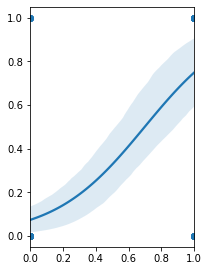

In [135]:
plt.figure(figsize=(10,15))
plt.subplot(3,3,1)
sns.regplot(y_test,y_pred, logistic=True)